In [8]:
pip install scikit-optimize

   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.8 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.8 kB ? eta -:--:--
   ------- -------------------------------- 20.5/107.8 kB 93.9 kB/s eta 0:00:01
   ------- -------------------------------- 20.5/107.8 kB 93.9 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/107.8 kB 100.9 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/107.8 kB 100.9 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/107.8 kB 109.3 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/107.8 kB 142.6 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/107.8 kB 142.6 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/107.8 kB 140.6 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/107.8 kB 140.6 kB/s eta 0:

C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

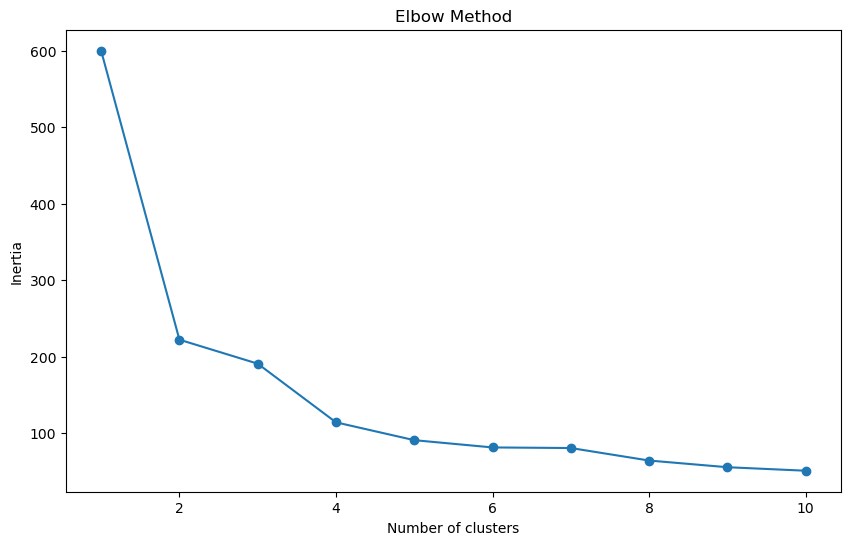

C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

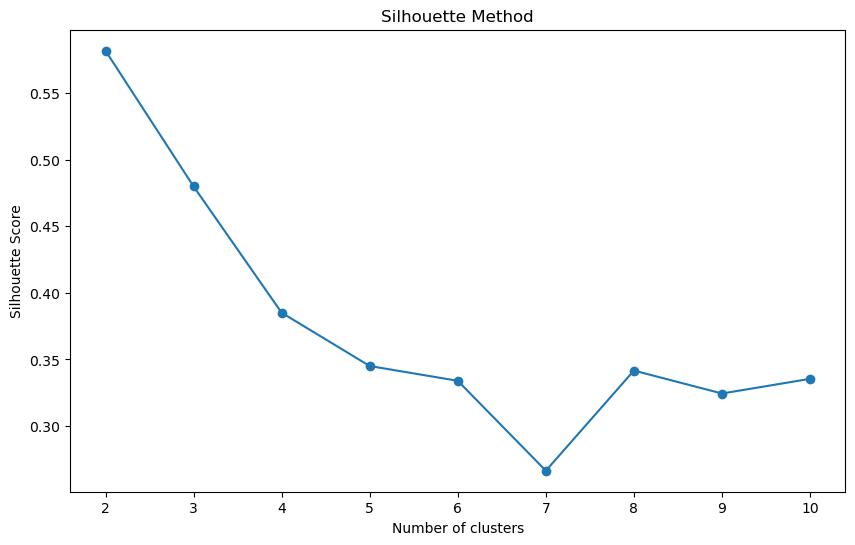

C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [5]
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [7]
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [5]
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [4]
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [9]
  warnings.warn(
C:\Users\AAC\Ap

Best Parameters: OrderedDict([('n_clusters', 10)])
Best Cross-Validation Score: -16.660056768216755
Optimized Inertia: 51.121095396505545
Silhouette Score: 0.33540615043919836


C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette method
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()
# Bayesian Optimization

# Define the search space
search_space = {
    'n_clusters': (2, 10)
}

# Define the Bayesian search
bayes_search = BayesSearchCV(
    estimator=KMeans(random_state=42),
    search_spaces=search_space,
    n_iter=32,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Perform the search
bayes_search.fit(X_scaled)

# Best parameters and score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Score:", bayes_search.best_score_)
# Manual Tuning
best_n_clusters = bayes_search.best_params_['n_clusters']
kmeans_optimized = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans_optimized.fit(X_scaled)

# Validate with inertia
print("Optimized Inertia:", kmeans_optimized.inertia_)
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_optimized.labels_))
